   #   Covid 19  Data scraping and analysis
   
   ### Abhishek Parab

Importing Required Library

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px



# geting data from worldometer website

In [2]:
soup=BeautifulSoup(requests.get("https://www.worldometers.info/coronavirus/").text,'lxml')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live Update: 178,214,814 Cases and 3,858,189 Deaths from the Coronavirus - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x6
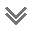

In [3]:
soup

# Finding the table  and collecting the information

In [4]:
table=soup.find("table",{'id':"main_table_countries_today"})

In [7]:
heading=[h.text.replace("\n","").replace("\xa0","")for h in table.find_all('th')]

In [6]:
heading

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'TotCases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [8]:
rows=[r for r in table.find_all('tr') if not r.has_attr('data-continent')]

In [9]:
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>178,214,814</td>
 <td

In [10]:
rows=rows[1:]

In [11]:
result=[]

In [12]:
result.append(heading)

In [13]:
for table_rows in rows:
    row=[]
    for data in table_rows.find_all('td'):
        if data.a is not None: row.append(data.a.text)
        else: row.append(data.text)
    result.append(row)
        

# Storing the scrap data into a csv file

In [14]:
csv_file = open("covidanalysis_csv","w",newline="")

In [15]:
writer=csv.writer(csv_file)

In [16]:
writer.writerows(result)

In [17]:
csv_file.close()

# Data cleaning process 

In [18]:
p=open("covidanalysis_csv",'r')

In [19]:
import pandas as pd

In [20]:
a=pd.read_csv(p)

In [21]:
a.head(20)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,World,"178,214,814","+29,339","3,858,189",617.0,"162,720,571","+36,755","11,636,054","82,417",...,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
1,1.0,USA,"34,377,592",NaN,"616,440",NaN,"28,641,439",NaN,"5,119,713","4,253",...,"497,400,629","1,494,299","332,865,530",North America,10,540,1.0,NaN,NaN,"15,381"
2,2.0,India,"29,762,793",+829,"383,521",NaN,"28,580,647","+7,626","798,625","8,944",...,"387,167,696","277,936","1,393,012,692",Asia,47,"3,632",4.0,0.6,NaN,573
3,3.0,Brazil,"17,704,041",NaN,"496,172",NaN,"16,077,483",NaN,"1,130,386","8,318",...,"52,714,701","246,320","214,009,122",South America,12,431,4.0,NaN,NaN,"5,282"
4,4.0,France,"5,749,691",NaN,"110,634",NaN,"5,536,263",NaN,"102,794","1,799",...,"89,931,097","1,374,836","65,412,256",Europe,11,591,1.0,NaN,NaN,"1,571"
5,5.0,Turkey,"5,354,153",NaN,"49,012",NaN,"5,219,797",NaN,"85,344",860,...,"57,899,862","679,504","85,208,965",Asia,16,"1,739",1.0,NaN,NaN,"1,002"
6,6.0,Russia,"5,264,047",NaN,"127,992",NaN,"4,839,705",NaN,"296,350","2,300",...,"143,900,000","985,653","145,994,597",Europe,28,"1,141",1.0,NaN,NaN,"2,030"
7,7.0,UK,"4,600,623",NaN,"127,945",NaN,"4,296,246",NaN,"176,432",208,...,"198,844,077","2,914,392","68,228,318",Europe,15,533,0.0,NaN,NaN,"2,586"
8,8.0,Italy,"4,249,755",NaN,"127,190",NaN,"4,023,957",NaN,"98,608",444,...,"69,299,685","1,147,795","60,376,352",Europe,14,475,1.0,NaN,NaN,"1,633"
9,9.0,Argentina,"4,222,400",NaN,"87,789",NaN,"3,818,346",NaN,"316,265","7,520",...,"15,613,752","342,456","45,593,473",South America,11,519,3.0,NaN,NaN,"6,937"


In [22]:
a=a.fillna(0)

In [23]:
a

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,0.0,World,"178,214,814","+29,339","3,858,189",617.0,"162,720,571","+36,755","11,636,054","82,417",...,0,0,0,All,\n,0,0.0,0.00,0.0,0
1,1.0,USA,"34,377,592",0,"616,440",0.0,"28,641,439",0,"5,119,713","4,253",...,"497,400,629","1,494,299","332,865,530",North America,10,540,1.0,0.00,0.0,"15,381"
2,2.0,India,"29,762,793",+829,"383,521",0.0,"28,580,647","+7,626","798,625","8,944",...,"387,167,696","277,936","1,393,012,692",Asia,47,"3,632",4.0,0.60,0.0,573
3,3.0,Brazil,"17,704,041",0,"496,172",0.0,"16,077,483",0,"1,130,386","8,318",...,"52,714,701","246,320","214,009,122",South America,12,431,4.0,0.00,0.0,"5,282"
4,4.0,France,"5,749,691",0,"110,634",0.0,"5,536,263",0,"102,794","1,799",...,"89,931,097","1,374,836","65,412,256",Europe,11,591,1.0,0.00,0.0,"1,571"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219.0,Samoa,3,0,,0.0,3,0,0,0,...,0,0,"199,679",Australia/Oceania,"66,560",0,0.0,0.00,0.0,0
220,220.0,Saint Helena,2,0,,0.0,2,0,0,0,...,0,0,"6,094",Africa,"3,047",0,0.0,0.00,0.0,0
221,221.0,Micronesia,1,0,,0.0,1,0,0,0,...,0,0,"116,179",Australia/Oceania,"116,179",0,0.0,0.00,0.0,0
222,222.0,China,"91,534",+23,"4,636",0.0,"86,397",+13,501,18,...,"160,000,000","111,163","1,439,323,776",Asia,"15,724","310,467",9.0,0.02,0.0,0.3


In [24]:
a.rename(columns={"Country,Other":"Country"})

,#,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,0.0,World,"178,214,814","+29,339","3,858,189",617.0,"162,720,571","+36,755","11,636,054","82,417",...,0,0,0,All,\n,0,0.0,0.00,0.0,0
1,1.0,USA,"34,377,592",0,"616,440",0.0,"28,641,439",0,"5,119,713","4,253",...,"497,400,629","1,494,299","332,865,530",North America,10,540,1.0,0.00,0.0,"15,381"
2,2.0,India,"29,762,793",+829,"383,521",0.0,"28,580,647","+7,626","798,625","8,944",...,"387,167,696","277,936","1,393,012,692",Asia,47,"3,632",4.0,0.60,0.0,573
3,3.0,Brazil,"17,704,041",0,"496,172",0.0,"16,077,483",0,"1,130,386","8,318",...,"52,714,701","246,320","214,009,122",South America,12,431,4.0,0.00,0.0,"5,282"
4,4.0,France,"5,749,691",0,"110,634",0.0,"5,536,263",0,"102,794","1,799",...,"89,931,097","1,374,836","65,412,256",Europe,11,591,1.0,0.00,0.0,"1,571"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219.0,Samoa,3,0,,0.0,3,0,0,0,...,0,0,"199,679",Australia/Oceania,"66,560",0,0.0,0.00,0.0,0
220,220.0,Saint Helena,2,0,,0.0,2,0,0,0,...,0,0,"6,094",Africa,"3,047",0,0.0,0.00,0.0,0
221,221.0,Micronesia,1,0,,0.0,1,0,0,0,...,0,0,"116,179",Australia/Oceania,"116,179",0,0.0,0.00,0.0,0
222,222.0,China,"91,534",+23,"4,636",0.0,"86,397",+13,501,18,...,"160,000,000","111,163","1,439,323,776",Asia,"15,724","310,467",9.0,0.02,0.0,0.3


In [25]:
covid=a[1:]

In [26]:
covid=covid.rename(columns={"Country,Other":"Country"})

In [27]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 1 to 223
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    223 non-null    float64
 1   Country              223 non-null    object 
 2   TotalCases           223 non-null    object 
 3   NewCases             223 non-null    object 
 4   TotalDeaths          223 non-null    object 
 5   NewDeaths            223 non-null    float64
 6   TotalRecovered       223 non-null    object 
 7   NewRecovered         223 non-null    object 
 8   ActiveCases          223 non-null    object 
 9   Serious,Critical     223 non-null    object 
 10  TotCases/1M pop      223 non-null    object 
 11  Deaths/1M pop        223 non-null    object 
 12  TotalTests           223 non-null    object 
 13  Tests/1M pop         223 non-null    object 
 14  Population           223 non-null    object 
 15  Continent            223 non-null    obj

In [28]:
covid.drop(['#'], axis='columns')

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,USA,"34,377,592",0,"616,440",0.0,"28,641,439",0,"5,119,713","4,253","103,278",...,"497,400,629","1,494,299","332,865,530",North America,10,540,1.0,0.00,0.0,"15,381"
2,India,"29,762,793",+829,"383,521",0.0,"28,580,647","+7,626","798,625","8,944","21,366",...,"387,167,696","277,936","1,393,012,692",Asia,47,"3,632",4.0,0.60,0.0,573
3,Brazil,"17,704,041",0,"496,172",0.0,"16,077,483",0,"1,130,386","8,318","82,726",...,"52,714,701","246,320","214,009,122",South America,12,431,4.0,0.00,0.0,"5,282"
4,France,"5,749,691",0,"110,634",0.0,"5,536,263",0,"102,794","1,799","87,899",...,"89,931,097","1,374,836","65,412,256",Europe,11,591,1.0,0.00,0.0,"1,571"
5,Turkey,"5,354,153",0,"49,012",0.0,"5,219,797",0,"85,344",860,"62,836",...,"57,899,862","679,504","85,208,965",Asia,16,"1,739",1.0,0.00,0.0,"1,002"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Samoa,3,0,,0.0,3,0,0,0,15,...,0,0,"199,679",Australia/Oceania,"66,560",0,0.0,0.00,0.0,0
220,Saint Helena,2,0,,0.0,2,0,0,0,328,...,0,0,"6,094",Africa,"3,047",0,0.0,0.00,0.0,0
221,Micronesia,1,0,,0.0,1,0,0,0,9,...,0,0,"116,179",Australia/Oceania,"116,179",0,0.0,0.00,0.0,0
222,China,"91,534",+23,"4,636",0.0,"86,397",+13,501,18,64,...,"160,000,000","111,163","1,439,323,776",Asia,"15,724","310,467",9.0,0.02,0.0,0.3


In [29]:
cols=['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'TotCases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'Population',  '1 Caseevery X ppl', '1 Deathevery X ppl',
       '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop']
    

covid[cols] = covid[cols].replace({ ',': ''}, regex=True)


In [30]:
for label in covid.columns:
    if label != 'Country' and label != 'Continent':
        covid[label]=pd.to_numeric(covid[label],errors='coerce').convert_dtypes() 

In [31]:
covid.drop(['1 Deathevery X ppl','1 Testevery X ppl','New Cases/1M pop','New Deaths/1M pop','Active Cases/1M pop'],
  axis='columns', inplace=True)

In [32]:
covid["%INC Cases"]=covid["NewCases"]/covid["TotalCases"]*100
covid["%INC Deaths"]=covid["NewDeaths"]/covid["TotalDeaths"]*100
covid["%INC Recovered"]=covid["NewRecovered"]/covid["TotalRecovered"]*100

In [33]:
covid

,#,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,%INC Cases,%INC Deaths,%INC Recovered
1,1,USA,34377592,0,616440,0,28641439,0,5119713,4253,103278.0,1852.0,497400629,1494299,332865530,North America,10,0.000000,0.000000,0.000000
2,2,India,29762793,829,383521,0,28580647,7626,798625,8944,21366.0,275.0,387167696,277936,1393012692,Asia,47,0.002785,0.000000,0.026682
3,3,Brazil,17704041,0,496172,0,16077483,0,1130386,8318,82726.0,2318.0,52714701,246320,214009122,South America,12,0.000000,0.000000,0.000000
4,4,France,5749691,0,110634,0,5536263,0,102794,1799,87899.0,1691.0,89931097,1374836,65412256,Europe,11,0.000000,0.000000,0.000000
5,5,Turkey,5354153,0,49012,0,5219797,0,85344,860,62836.0,575.0,57899862,679504,85208965,Asia,16,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,Samoa,3,0,<NA>,0,3,0,0,0,15.0,0.0,0,0,199679,Australia/Oceania,66560,0.000000,NaN,0.000000
220,220,Saint Helena,2,0,<NA>,0,2,0,0,0,328.0,0.0,0,0,6094,Africa,3047,0.000000,NaN,0.000000
221,221,Micronesia,1,0,<NA>,0,1,0,0,0,9.0,0.0,0,0,116179,Australia/Oceania,116179,0.000000,NaN,0.000000
222,222,China,91534,23,4636,0,86397,13,501,18,64.0,3.0,160000000,111163,1439323776,Asia,15724,0.025127,0.000000,0.015047


### first we will get the visualization of data according to continent

In [34]:
continent_df=covid.groupby("Continent").sum().drop("All")
continent_df=continent_df.reset_index()
continent_df

,Continent,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl,%INC Cases,%INC Deaths,%INC Recovered
0,0,413,721,0,15,0,706,0,0,0,0.0,0.0,0,0,0,0,0.000000,0.000000,0.000000
1,Africa,7591,5179703,19,136668,0,4597987,10,445048,2946,591488.0,8315.0,50843431,4881982,1371236383,224058,0.081023,0.000000,0.046516
2,Asia,4223,54102447,19092,759301,253,51362621,23883,1980525,26713,1460901.0,14255.0,940388684,34647993,4642047338,54208,10.967345,13.737144,11.363724
3,Australia/Oceania,2260,70917,8,1259,0,67832,2,1826,10,113224.0,1205.0,22176546,3530002,42771332,317396,0.059941,0.000000,0.075047
4,Europe,3683,47345330,1985,1090165,66,44814118,8165,1441047,9212,3569935.0,68995.0,926328450,81849479,748064297,912,0.200452,0.191733,0.650007
5,North America,5649,40280881,5553,910303,200,33576693,2248,5793885,11651,1263480.0,17675.0,557247930,28700180,593535056,5823,1.138317,1.573532,0.369326
6,South America,934,31234815,2682,960478,98,26579949,2514,1864429,31885,772755.0,20862.0,127827193,6765675,434167464,414,0.642865,0.615423,0.755722


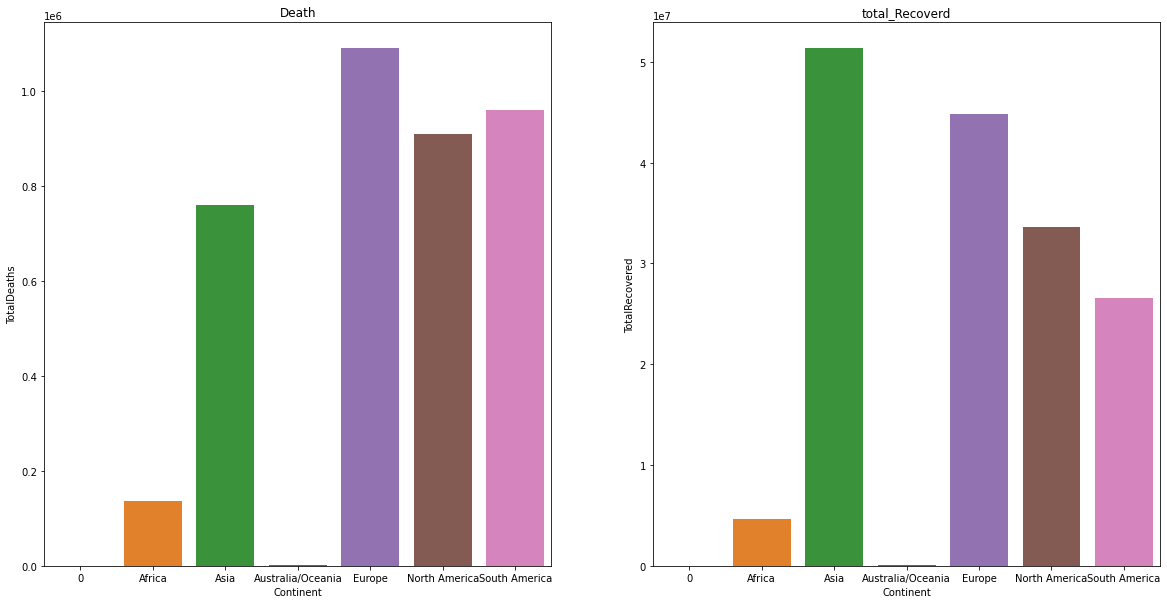

In [35]:
fig, axes = plt.subplots(1,2,figsize=(20,10))

sns.barplot(x='Continent',
            y = 'TotalDeaths',
            
            data = continent_df, ax=axes[0]
            )

sns.barplot(x='Continent',
            y = 'TotalRecovered',
            data = continent_df, ax=axes[1]
            )
axes[0].set_title("Death")
axes[1].set_title("total_Recoverd")
# Show the plot
plt.show()

as we can see number of Deaths are higher in Europe  and total Recovery is higher in Asia

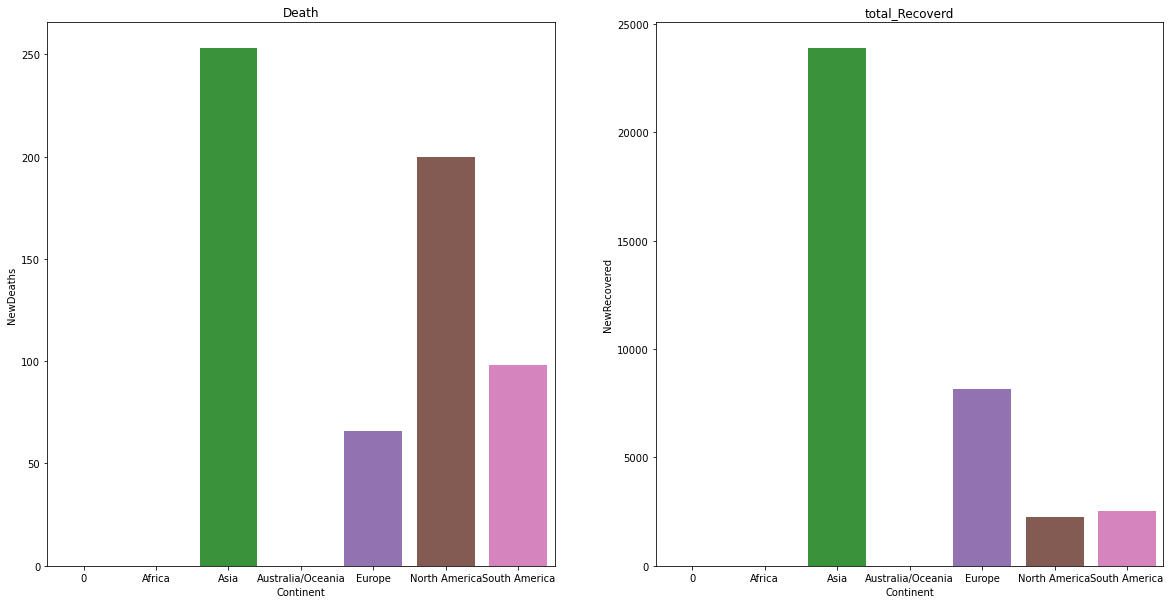

In [36]:
fig, axes = plt.subplots(1,2,figsize=(20,10))

sns.barplot(x='Continent',
            y = 'NewDeaths',
            
            data = continent_df, ax=axes[0]
            )

sns.barplot(x='Continent',
            y = 'NewRecovered',
            data = continent_df, ax=axes[1]
            )
axes[0].set_title("Death")
axes[1].set_title("total_Recoverd")
# Show the plot
plt.show()

IN the new Death Asia has the higher number of Deaths but also Higher number of Recovery



# Data of top 5 Country affected by covid 19

In [38]:
top5=covid.nlargest(6,['TotalCases'])

In [39]:
top5=top5[1:]

In [40]:
top5

,#,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,%INC Cases,%INC Deaths,%INC Recovered
1,1,USA,34377592,0,616440,0,28641439,0,5119713,4253,103278.0,1852.0,497400629,1494299,332865530,North America,10,0.000000,0.0,0.000000
2,2,India,29762793,829,383521,0,28580647,7626,798625,8944,21366.0,275.0,387167696,277936,1393012692,Asia,47,0.002785,0.0,0.026682
3,3,Brazil,17704041,0,496172,0,16077483,0,1130386,8318,82726.0,2318.0,52714701,246320,214009122,South America,12,0.000000,0.0,0.000000
4,4,France,5749691,0,110634,0,5536263,0,102794,1799,87899.0,1691.0,89931097,1374836,65412256,Europe,11,0.000000,0.0,0.000000
5,5,Turkey,5354153,0,49012,0,5219797,0,85344,860,62836.0,575.0,57899862,679504,85208965,Asia,16,0.000000,0.0,0.000000


Text(0.5, 1.0, 'Total Cases')

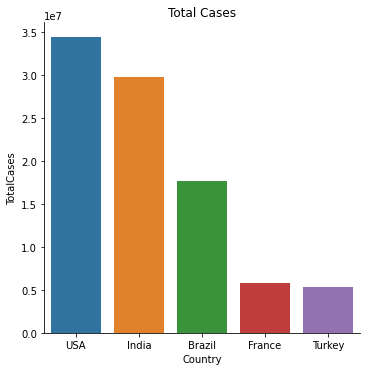

In [112]:
sns.catplot(x ='Country', y ='TotalCases', 
               kind = 'bar',  
               data = top5)
plt.title("Total Cases")

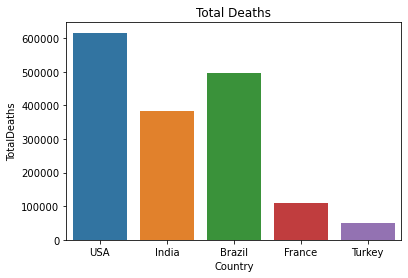

In [113]:
sns.barplot(x='Country',
            y = 'TotalDeaths',
            
            data = top5
            )
plt.title("Total Deaths")
plt.show()

Text(0.5, 1.0, 'Total Recovered')

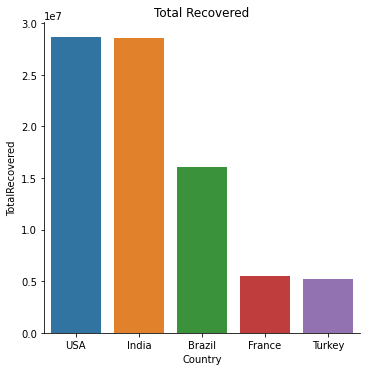

In [43]:
sns.catplot(x ='Country', y ='TotalRecovered', 
               kind = 'bar',  
               data = top5)
plt.title("Total Recovered")

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Total Test')

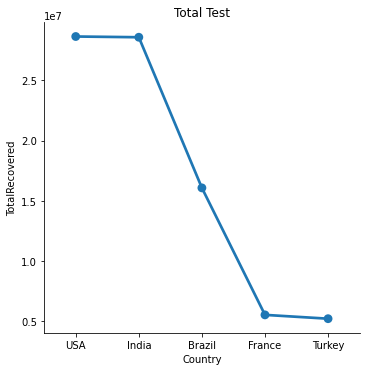

In [44]:
sns.factorplot(x ='Country', y ='TotalRecovered' 
              , data = top5)
plt.title("Total Test")

Text(0.5, 1.0, 'Critical-Seroius')

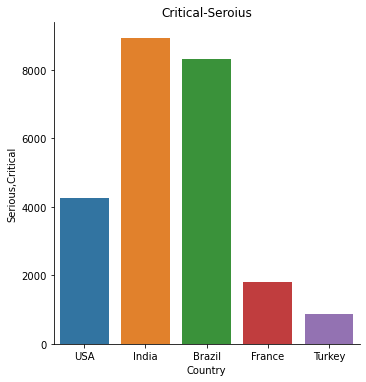

In [45]:
sns.catplot(x ='Country', y ='Serious,Critical',
               kind = 'bar', data = top5)
plt.title("Critical-Seroius")

<AxesSubplot:>

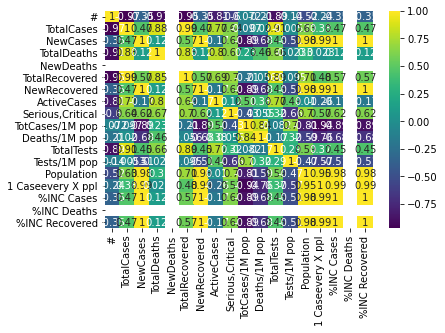

In [47]:
fig=figsize=(20,10)
sns.heatmap(top5.corr(), annot = True, cmap = 'viridis')

# Data of Least affected country

In [48]:
least5=covid.nsmallest(6,['TotalCases'])

In [49]:
least5

,#,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,%INC Cases,%INC Deaths,%INC Recovered
221,221,Micronesia,1,0,<NA>,0,1,0,0,0,9.0,0.0,0,0,116179,Australia/Oceania,116179,0.0,NaN,0.0
220,220,Saint Helena,2,0,<NA>,0,2,0,0,0,328.0,0.0,0,0,6094,Africa,3047,0.0,NaN,0.0
219,219,Samoa,3,0,<NA>,0,3,0,0,0,15.0,0.0,0,0,199679,Australia/Oceania,66560,0.0,NaN,0.0
217,217,Vanuatu,4,0,1,0,3,0,0,0,13.0,3.0,23000,73249,313999,Australia/Oceania,78500,0.0,0.0,0.0
218,218,Marshall Islands,4,0,<NA>,0,4,0,0,0,67.0,0.0,0,0,59573,Australia/Oceania,14893,0.0,NaN,0.0
216,216,MS Zaandam,9,0,2,0,7,0,0,0,0.0,0.0,0,0,<NA>,0,0,0.0,0.0,0.0


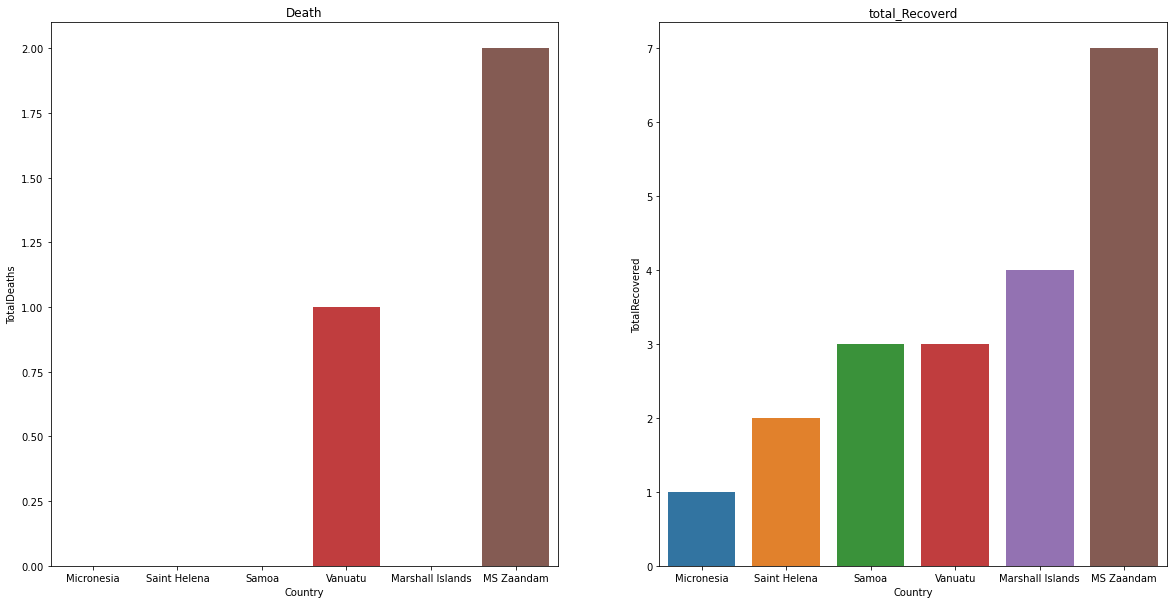

In [50]:
fig, axes = plt.subplots(1,2,figsize=(20,10))

sns.barplot(x='Country',
            y = 'TotalDeaths',
            
            data = least5, ax=axes[0]
            )

sns.barplot(x='Country',
            y = 'TotalRecovered',
            data = least5, ax=axes[1]
            )

axes[0].set_title("Death")
axes[1].set_title("total_Recoverd")
# Show the plot
plt.show()

Text(0.5, 1.0, 'Total Cases')

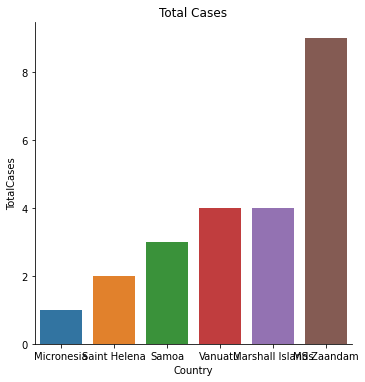

In [114]:
sns.catplot(x ='Country', y ='TotalCases', 
               kind = 'bar',  
               data = least5)
plt.title("Total Cases")

# Covid Information of the World

In [71]:
a11=a

In [79]:
a11=a11.iloc[0]

In [81]:
a11=pd.DataFrame(a11)

In [91]:

df_tr = a11.transpose()

In [93]:
df_tr.fillna("world")

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,0,world,178214814,29339,3858189,617,162720571,36755,11636054,82417,...,0,0,0,All,world,0,0,0.0,0.0,0.0


<AxesSubplot:>

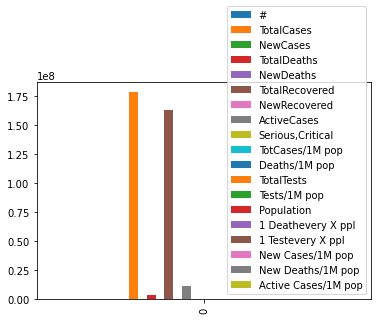

In [111]:
df_tr.plot(kind="bar")